In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset loading

In [2]:
dataset = pd.read_csv('../Y3 - Sample data/Z2 - datasetprepclean.csv', index_col = 0,
                     )
print('dataset shape:', dataset.shape)
dataset.head()

dataset shape: (4768, 278)


,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,no_hole_area,thickness,...,bend_edge_angle_min_09,bend_edge_angle_max_09,bend_edge_length_mean_09,bend_edge_length_std_09,bend_edge_length_min_09,bend_edge_length_max_09,VAMAT,VALAJOUT,VALTOT,bend_group
COART,,,,,,,,,,,,,,,,,,,,,
L1600360,3178.489502,9,0,285678.093750,431798.46875,722.070984,598.000000,320484.593750,286893.718750,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.51,5.15,17.66,3-5
L1600470,317.114502,1,0,3403.138184,3500.00000,140.000000,25.000000,3403.138184,3403.138184,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.92,1.17,0
L1600700,625.429871,2,0,10823.929688,12759.00000,255.179993,50.000000,11152.315430,11152.315430,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.75,1.61,2.36,1-2
L1600710,625.429871,2,0,10823.929688,12759.00000,255.179993,50.000000,11152.315430,11152.315430,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.75,1.61,2.36,1-2
L1605790,2535.909668,5,0,184134.328125,355747.34375,826.389404,430.483917,230244.703125,184672.265625,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.24,5.72,17.96,3-5


In [3]:
dataset.columns.values

array(['cut_length', 'num_closed_patterns', 'num_open_patterns',
       'total_area', 'minimum_rectangle_area', 'minimum_rectangle_dim1',
       'minimum_rectangle_dim2', 'convex_hull_area', 'no_hole_area',
       'thickness', 'radius_approx', 'radius_count', 'direction_count',
       'bend_count', 'bend_radius_00', 'bend_angle_00',
       'bend_direction_00', 'deformation_length_00', 'merged_bend_00',
       'punch_length_00', 'bend_radius_01', 'bend_angle_01',
       'bend_direction_01', 'deformation_length_01', 'merged_bend_01',
       'punch_length_01', 'bend_radius_02', 'bend_angle_02',
       'bend_direction_02', 'deformation_length_02', 'merged_bend_02',
       'punch_length_02', 'bend_radius_03', 'bend_angle_03',
       'bend_direction_03', 'deformation_length_03', 'merged_bend_03',
       'punch_length_03', 'bend_radius_04', 'bend_angle_04',
       'bend_direction_04', 'deformation_length_04', 'merged_bend_04',
       'punch_length_04', 'bend_radius_05', 'bend_angle_05',
     

In [4]:
for index, nancount in dataset.isnull().sum().iteritems():
    if nancount != 0:
        print(index, '-->', nancount)
else:
    print('Done !')

deformation_length_00 --> 239
deformation_length_01 --> 107
deformation_length_02 --> 8
deformation_length_03 --> 3
deformation_length_04 --> 1
Done !


In [5]:
#Cleaning of the remaining Nan
#dataset = dataset.fillna(0)
dataset = dataset.dropna()
dataset.shape

(4501, 278)

# cleaning to have at least min occurences

In [6]:
minocc = 50
todrop = []
df = dataset['thickness'].reset_index().groupby('thickness').count()
for index, occ in df.iterrows():
    if occ.COART <= minocc:
        todrop.append(index)
        print(index, 'will be dropped')

for thickness in todrop:
    dataset = dataset[dataset['thickness'] != thickness]

1.0 will be dropped
1.5 will be dropped
2.0 will be dropped
20.0 will be dropped


# Dataset re-ordering and Splitting

In [226]:
start = dataset.columns.values
todrop = ['bend_group', 'VAMAT', 'VALAJOUT', 'VALTOT', 'radius_approx']

def representsInt(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False
benddetails  = [x for x in dataset.columns.values if representsInt(x[-2:])]
#todrop.extend(benddetails)

tokeep = [x for x in start if x not in todrop ]
tokeep

['cut_length',
 'num_closed_patterns',
 'num_open_patterns',
 'total_area',
 'minimum_rectangle_area',
 'minimum_rectangle_dim1',
 'minimum_rectangle_dim2',
 'convex_hull_area',
 'no_hole_area',
 'thickness',
 'radius_count',
 'direction_count',
 'bend_count',
 'bend_radius_00',
 'bend_angle_00',
 'bend_direction_00',
 'deformation_length_00',
 'merged_bend_00',
 'punch_length_00',
 'bend_radius_01',
 'bend_angle_01',
 'bend_direction_01',
 'deformation_length_01',
 'merged_bend_01',
 'punch_length_01',
 'bend_radius_02',
 'bend_angle_02',
 'bend_direction_02',
 'deformation_length_02',
 'merged_bend_02',
 'punch_length_02',
 'bend_radius_03',
 'bend_angle_03',
 'bend_direction_03',
 'deformation_length_03',
 'merged_bend_03',
 'punch_length_03',
 'bend_radius_04',
 'bend_angle_04',
 'bend_direction_04',
 'deformation_length_04',
 'merged_bend_04',
 'punch_length_04',
 'bend_radius_05',
 'bend_angle_05',
 'bend_direction_05',
 'deformation_length_05',
 'merged_bend_05',
 'punch_length_

In [227]:
#Dataset definition
X = dataset[tokeep]
y = dataset[['VAMAT', 'VALAJOUT', 'VALTOT']]

In [228]:
# Dataset splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0 ,stratify=dataset['bend_group'])

#ONLY FOR DATASET CLEANING PURPOSE
#X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.5, random_state=0 ,stratify=dataset['bend_group'])

# Target definition

In [229]:
target = 'VALTOT'
assert target in y.columns.values, 'The target must be in y dataset'

# Blocs creation

In [230]:
#Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [231]:
# Metric MSE
from sklearn.metrics import mean_squared_error

In [232]:
# Metric MAPE Mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

from sklearn.metrics import make_scorer
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
mape_scorer

make_scorer(mean_absolute_percentage_error, greater_is_better=False)

In [233]:
#regressions
import lightgbm as lgb

gbm = lgb.LGBMRegressor(objective='regression',
                        learning_rate=0.05,
                        n_estimators=400,
                        min_child_samples=10,
                        random_state=0,
                        max_depth=500,
                       )

In [234]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [235]:
pipe = [('scaler', scaler), ('gbm', gbm)]
regpip = Pipeline(pipe)

In [236]:
regpip.fit(X_train, y_train[target])

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gbm', LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.05, max_depth=500, min_child_samples=10,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=400,
       n_jobs=-1, num_leaves=31, objective='regression', random_state=0,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1))])

In [245]:
param_grid = {
    #'gbm__learning_rate': [0.05, 0.1, ],
    #'gbm__n_estimators': [300, 400, 500],
    'gbm__min_child_samples' : [15,10,5],
    'gbm__lambda_l1': np.logspace(-3,3,4),
    #'gbm__lambda_l2': np.logspace(-3,3,4),
    #'gbm__max_bin':[200, 150],
    #'gbm__num_leaves':[20,25],
    #'gbm__max_depth':[500,750],
    #'gbm__min_split_gain':[0,.1]
}

#RMSE version
gridgbm = GridSearchCV(regpip, param_grid, cv=3, n_jobs=-2, scoring='neg_mean_squared_error', verbose=5)

#MAPE version
#gridgbm = GridSearchCV(regpip, param_grid, cv=3, n_jobs=-2, scoring=mape_scorer, verbose=0)

In [246]:
gridgbm.fit(X_train, y_train[target])

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] gbm__lambda_l1=0.001, gbm__min_child_samples=15 .................
[CV] gbm__lambda_l1=0.001, gbm__min_child_samples=15 .................
[CV] gbm__lambda_l1=0.001, gbm__min_child_samples=15 .................
[CV]  gbm__lambda_l1=0.001, gbm__min_child_samples=15, score=-4.886110850938424, total=   5.6s
[CV] gbm__lambda_l1=0.001, gbm__min_child_samples=10 .................
[CV]  gbm__lambda_l1=0.001, gbm__min_child_samples=15, score=-5.5298012860864, total=   6.1s
[CV] gbm__lambda_l1=0.001, gbm__min_child_samples=10 .................
[CV]  gbm__lambda_l1=0.001, gbm__min_child_samples=15, score=-4.2930954098888074, total=   6.4s
[CV] gbm__lambda_l1=0.001, gbm__min_child_samples=10 .................
[CV]  gbm__lambda_l1=0.001, gbm__min_child_samples=10, score=-4.609701484804392, total=   5.2s
[CV] gbm__lambda_l1=0.001, gbm__min_child_samples=5 ..................
[CV]  gbm__lambda_l1=0.001, gbm__min_child_samples=10, score=-4

[Parallel(n_jobs=-2)]: Done  12 tasks      | elapsed:   25.7s


[CV]  gbm__lambda_l1=0.1, gbm__min_child_samples=10, score=-4.619275815083284, total=   5.5s
[CV] gbm__lambda_l1=0.1, gbm__min_child_samples=5 ....................
[CV]  gbm__lambda_l1=0.1, gbm__min_child_samples=10, score=-4.5071933908659565, total=   6.6s
[CV] gbm__lambda_l1=0.1, gbm__min_child_samples=5 ....................
[CV]  gbm__lambda_l1=0.1, gbm__min_child_samples=10, score=-4.427601796062197, total=   6.6s
[CV] gbm__lambda_l1=0.1, gbm__min_child_samples=5 ....................
[CV]  gbm__lambda_l1=0.1, gbm__min_child_samples=5, score=-4.723576733362086, total=   6.6s
[CV] gbm__lambda_l1=10.0, gbm__min_child_samples=15 ..................
[CV]  gbm__lambda_l1=0.1, gbm__min_child_samples=5, score=-4.285606427396449, total=   6.7s
[CV] gbm__lambda_l1=10.0, gbm__min_child_samples=15 ..................
[CV]  gbm__lambda_l1=0.1, gbm__min_child_samples=5, score=-4.796356575926214, total=   6.3s
[CV] gbm__lambda_l1=10.0, gbm__min_child_samples=15 ..................
[CV]  gbm__lambda_

[Parallel(n_jobs=-2)]: Done  36 out of  36 | elapsed:   58.1s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gbm', LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.05, max_depth=500, min_child_samples=10,
       min_child_weight=0.001, min_sp...0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1))]),
       fit_params=None, iid=True, n_jobs=-2,
       param_grid={'gbm__min_child_samples': [15, 10, 5], 'gbm__lambda_l1': array([1.e-03, 1.e-01, 1.e+01, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=5)

In [252]:
target

'VALTOT'

In [247]:
gridgbm.best_params_

{'gbm__lambda_l1': 0.001, 'gbm__min_child_samples': 10}

In [248]:
gridgbm.best_score_

-4.479405688961041

In [249]:
mean_absolute_percentage_error(y_test[target], gridgbm.predict(X_test))

17.530403150704583

In [250]:
mean_squared_error(y_test[target], gridgbm.predict(X_test))

4.823862217127082

In [253]:
mean_squared_error(y_train[target], gridgbm.predict(X_train))

0.3649290477771504

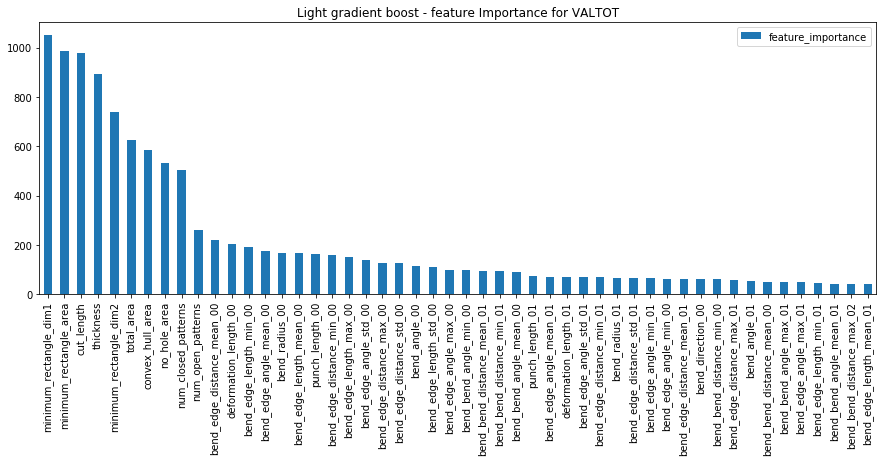

In [273]:
featimp = list(gridgbm.best_estimator_.named_steps['gbm'].feature_importances_)
df = pd.DataFrame({'feature_importance':featimp}, index =X_test.columns.values)
df = df.sort_values('feature_importance', ascending=False)
df[:50].plot.bar(figsize=(15,5))
plt.title(f'Light gradient boost - feature Importance for {target}')
plt.show()

# Solution comparison

In [255]:
prediction_lgbm = gridgbm.predict(X_test)

In [256]:
resultset = pd.DataFrame({target: y_test[target],
                          'pred_lgbm':prediction_lgbm,
                            }, index=y_test.index)
resultset.head()

,VALTOT,pred_lgbm
COART,,
L2507240,4.33,3.867738
L2605990,30.11,29.769154
L3048040,8.04,7.453151
L8038340,3.38,3.285646
L8828360,1.59,1.921609


In [257]:
mean_squared_error(resultset[target], resultset['pred_lgbm'])

4.823862217127082

In [258]:
resultset['RMSE_lgbm'] = (resultset[target]-resultset['pred_lgbm'])**2
resultset.head()

,VALTOT,pred_lgbm,RMSE_lgbm
COART,,,
L2507240,4.33,3.867738,0.213686
L2605990,30.11,29.769154,0.116176
L3048040,8.04,7.453151,0.344392
L8038340,3.38,3.285646,0.008903
L8828360,1.59,1.921609,0.109965


In [259]:
#
comparisonset = pd.merge(resultset.reset_index(), X_test.reset_index(), on='COART', how='inner')
comparisonset.head()

,COART,VALTOT,pred_lgbm,RMSE_lgbm,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,...,bend_edge_distance_min_09,bend_edge_distance_max_09,bend_edge_angle_mean_09,bend_edge_angle_std_09,bend_edge_angle_min_09,bend_edge_angle_max_09,bend_edge_length_mean_09,bend_edge_length_std_09,bend_edge_length_min_09,bend_edge_length_max_09
0,L2507240,4.33,3.867738,0.213686,831.576904,1,0,32598.949219,32800.898438,328.009003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,L2605990,30.11,29.769154,0.116176,2985.817627,5,0,299138.312500,400558.625000,769.817993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,L3048040,8.04,7.453151,0.344392,1387.289307,3,0,49304.828125,82270.414062,422.843750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,L8038340,3.38,3.285646,0.008903,978.483765,6,0,22766.531250,24131.550781,321.753998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,L8828360,1.59,1.921609,0.109965,692.500916,7,0,4417.547363,8039.794434,115.647423,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


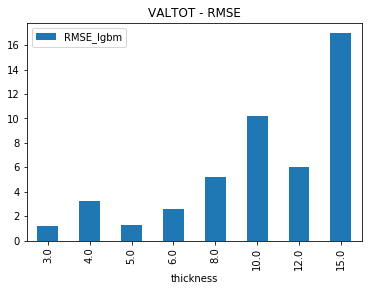

,RMSE_lgbm
thickness,
3.0,1.181461
4.0,3.227634
5.0,1.288592
6.0,2.572506
8.0,5.246901
10.0,10.241011
12.0,6.043800
15.0,16.965828


In [272]:
# Is the error sourced by thickness ?
df = comparisonset[['RMSE_lgbm', 'thickness']].groupby('thickness').mean()
df.plot.bar()
plt.title(f'{target} - RMSE')
plt.show()
df

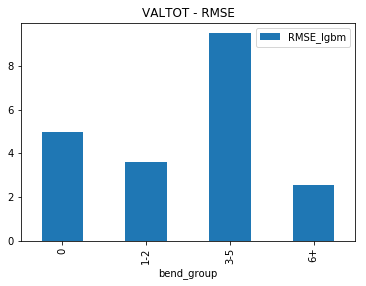

,RMSE_lgbm
bend_group,
0,4.966290
1-2,3.611417
3-5,9.498491
6+,2.532005


In [271]:
# Is the error sourced by number of errors ?
def bendgroupcalc(entry):
    if entry == 0:
        return '0'
    elif entry <= 2:
        return '1-2'
    elif entry <= 5:
        return '3-5'
    else:
        return '6+'
    return 'None'

comparisonset['bend_group'] = comparisonset['bend_count'].apply(bendgroupcalc)

df = comparisonset[['RMSE_lgbm', 'bend_group']].groupby('bend_group').mean()
df.plot.bar()
plt.title(f'{target} - RMSE')
plt.show()
df

In [262]:
comparisonset['percent_error'] = ((comparisonset[target] / comparisonset['pred_lgbm'])-1)*100
comparisonset[[target, 'pred_lgbm', 'percent_error']].head()

,VALTOT,pred_lgbm,percent_error
0,4.33,3.867738,11.951735
1,30.11,29.769154,1.144963
2,8.04,7.453151,7.873842
3,3.38,3.285646,2.871708
4,1.59,1.921609,-17.256855


In [263]:
#MAPE
comparisonset['percent_error'].mean()

0.11450606123931789

In [264]:
df = comparisonset[['RMSE_lgbm', 'percent_error', 'thickness', 'bend_group', 'COART']].groupby(['thickness', 'bend_group'])#.mean()
df.agg({'RMSE_lgbm': ['mean', 'max'], 'percent_error': ['mean', 'max'],'COART':['count'] })

RMSE_lgbm             percent_error              COART
                           mean         max          mean          max count
thickness bend_group                                                        
3.0       0            0.141555    0.474058      0.450059    29.147205     7
          1-2          1.857345    8.616713     -0.333480    24.996332    13
          3-5          1.088943    3.786243      5.696135    43.387876     7
          6+           0.321939    0.321939      6.934186     6.934186     1
4.0       0            1.896269   26.871475      6.545278    64.014794    35
          1-2          2.807586  161.375966     -4.154313    31.625103   114
          3-5          5.424922   49.466723     -4.498811    21.426018    43
5.0       0            0.485047    3.160742     -1.670727    76.186422    59
          1-2          1.641885   75.111190      0.094997    41.566095    92
          3-5          1.535391   21.942928     -2.489567    26.022810    29
          6+           3.871608    9.998858     -3.203677    10.618637     3
6.0       0            2.008985   60.597637     -0.498874   201.516571   145
          1-2          3.008680  222.709878     -2.450469    76.275470   174
          3-5          2.907854   30.548858     -6.740261    45.834404    29
          6+           2.014127    6.516040     -5.246417     0.695800     7
8.0       0            4.243100  161.794646      8.184073  1284.642085   136
          1-2          5.153692  138.628548      1.304693   196.497053   114
          3-5         11.415279   80.647876     -3.553970    46.652662    24
          6+           4.348409    4.348409     21.688460    21.688460     1
10.0      0            6.535328  216.322965      4.936539   150.818334    95
          1-2          6.752801  248.056393      3.038199   141.505227    71
          3-5         85.203856  313.093970     15.225556    50.750576     8
12.0      0            6.361434  100.507043     -3.093964   342.153983    54
          1-2          4.450929   32.177229     -5.946499    25.699451    19
          3-5         12.599947   18.798945    -16.369697    -8.265302     2
15.0      0           18.589054  571.098639     -5.068685    44.823945    52
          1-2          0.037579    0.070947     -0.639927     1.375641     4
          3-5          8.618452   17.129692     11.301269    20.912344     2

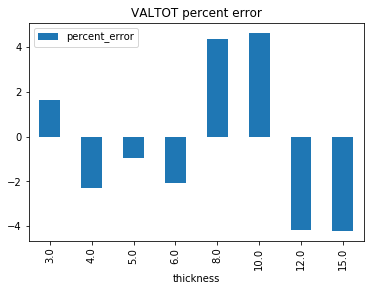

,percent_error
thickness,
3.0,1.629368
4.0,-2.281020
5.0,-0.937932
6.0,-2.058904
8.0,4.356953
10.0,4.634987
12.0,-4.170626
15.0,-4.198772


In [269]:
df = comparisonset[['percent_error', 'thickness']].groupby('thickness').mean()
df.plot.bar()
plt.title(f'{target} percent error')
plt.show()
df

In [266]:
df = comparisonset[['COART', 'thickness']]
df.groupby('thickness').count()

,COART
thickness,
3.0,28
4.0,192
5.0,183
6.0,355
8.0,275
10.0,174
12.0,75
15.0,58


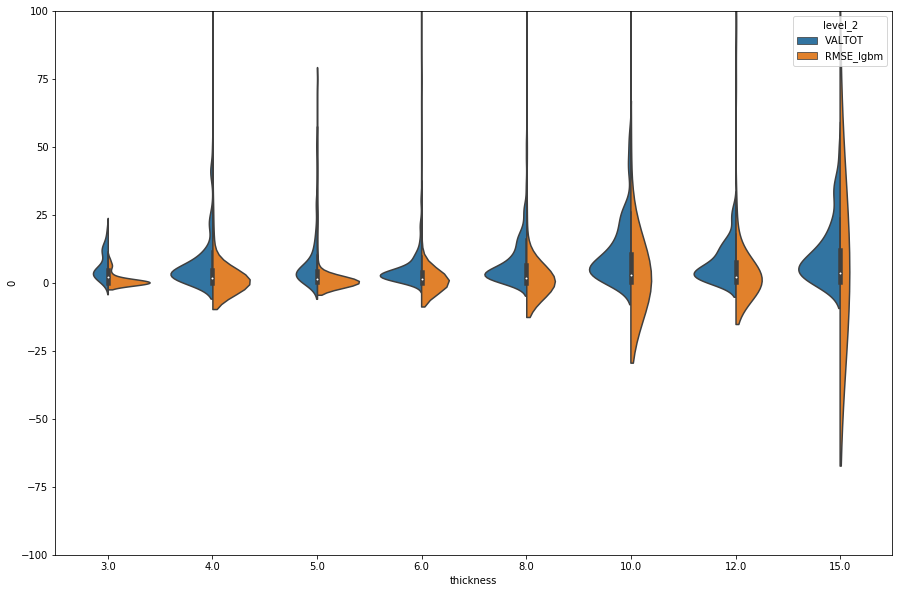

In [267]:
df=comparisonset[[target, 'RMSE_lgbm', 'COART', 'thickness']]
#df=df[df['thickness']!=15]
df.set_index(['COART', 'thickness'], inplace=True)
df = df.stack().reset_index()
fig, ax = plt.subplots(figsize=(15,10))
ax.set_ylim(-100, 100)
sns.violinplot(x="thickness", y=0, data=df, split=True, hue='level_2', ax=ax)

plt.show()

In [268]:
df = comparisonset[['percent_error', 'COART', 'thickness']]
df.set_index('COART', inplace=True)
worst = df.groupby('thickness')['percent_error'].nlargest(3)
worst
#worst.to_csv('worst_s0.csv')

thickness  COART   
3.0        L3029910      43.387876
           L8056470      29.147205
           L3122860      24.996332
4.0        L6005440      64.014794
           L3104520      61.309961
           L6008040      49.744289
5.0        L3105471      76.186422
           L3105470      72.911582
           L3105180      58.157923
6.0        L2611660     201.516571
           L2522650     156.754455
           L3105440     111.791459
8.0        L3128890    1284.642085
           L7046690     279.273213
           L6010691     196.497053
10.0       L3036260     150.818334
           L3131690     141.505227
           L8024691      91.205699
12.0       L7047481     342.153983
           L6816400     122.638687
           L8009471      38.348106
15.0       L7067230      44.823945
           L3124810      43.475333
           L3022570      34.403620
Name: percent_error, dtype: float64

In [187]:
dataset.loc['L7056380']

cut_length                    837.534
num_closed_patterns                 6
num_open_patterns                   0
total_area                    8195.87
minimum_rectangle_area          17536
minimum_rectangle_dim1            140
minimum_rectangle_dim2        125.257
convex_hull_area                13558
no_hole_area                  9378.37
thickness                           3
radius_approx                    True
radius_count                        1
direction_count                     1
bend_count                          2
bend_radius_00                      3
bend_angle_00                      90
bend_direction_00                  -1
deformation_length_00            44.5
merged_bend_00                      0
punch_length_00                  54.5
bend_radius_01                      3
bend_angle_01                      90
bend_direction_01                  -1
deformation_length_01            44.5
merged_bend_01                      0
punch_length_01                  54.5
bend_radius_